In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.manifold import TSNE
from tqdm import tqdm

# 高いAttention→ユーザ13534。低いAttention→ユーザ18762。

In [2]:
model = torch.load(r"D:\fujiwara\KGAT-pytorch-master\trained_model\KGAT\last-fm\embed-dim64_relation-dim64_random-walk_bi-interaction_64-32-16_lr0.0001_pretrain0\model_epoch1670.pth")
model

d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\torch\cuda\__init__.py:125: UserWarning: 
NVIDIA GeForce RTX 3070 Ti with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the NVIDIA GeForce RTX 3070 Ti GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


{'model_state_dict': OrderedDict([('trans_M',
               tensor([[[-1.7485e-01,  9.6364e-02, -3.8881e-02,  ...,  1.7726e-01,
                         -4.7402e-02, -2.0649e-01],
                        [-4.6499e-02, -1.3184e-01,  2.3823e-01,  ...,  5.3792e-03,
                         -5.4012e-02,  1.5614e-02],
                        [ 6.4394e-02, -5.4251e-02,  2.8947e-01,  ...,  2.5659e-01,
                         -4.2418e-01, -1.4565e-01],
                        ...,
                        [-3.5683e-04,  3.1322e-01,  1.8240e-01,  ..., -1.9529e-01,
                          3.4260e-01, -9.9182e-02],
                        [-7.5362e-02,  1.7911e-01,  1.4595e-01,  ..., -8.2009e-02,
                          2.5519e-02, -4.5829e-02],
                        [-2.0286e-02, -1.5357e-01, -1.7352e-02,  ...,  4.7087e-02,
                         -8.5812e-02, -5.4746e-02]],
               
                       [[-2.3737e-02,  3.8971e-01, -1.0895e-01,  ...,  1.9008e-01,
               

In [6]:
model["model_state_dict"]["entity_user_embed.weight"]

tensor([[-1.0950, -0.3342, -0.1106,  ...,  0.4267,  1.0468,  0.3243],
        [-0.5771,  0.2741, -0.6613,  ...,  0.0977, -0.3162, -0.2384],
        [ 0.0342,  0.7380, -0.3019,  ..., -0.1136,  0.2351,  0.1540],
        ...,
        [ 0.0114,  0.2754,  0.2438,  ...,  0.9241, -0.0032, -0.7088],
        [-0.6811, -0.0570, -0.1441,  ...,  0.3068, -0.0312, -0.1534],
        [ 0.8832,  0.2486,  0.7930,  ..., -0.5594,  1.0810, -1.3358]],
       device='cuda:0')

In [10]:
model["model_state_dict"]["entity_user_embed.weight"][129954]

tensor([ 0.8832,  0.2486,  0.7930, -0.5265,  0.8776,  0.1943,  0.7307, -0.9783,
         0.6051,  1.5685, -0.0459,  0.4115,  0.1773, -0.8300,  0.1630, -0.0835,
        -0.2542, -0.6624, -0.1238, -0.7086,  1.2737,  0.4434,  0.3336,  0.3647,
        -0.2216,  0.8429,  1.1129,  0.2992,  2.0025, -0.5444,  1.7712, -0.6062,
        -0.6208,  1.3539,  0.1804, -0.8919, -0.0311,  0.1802, -0.0204,  0.7538,
        -1.3587, -0.0719,  0.4719, -0.0481, -0.6469, -0.5324, -0.6149, -0.5323,
         0.2921, -1.1949, -1.6404,  0.3987,  0.1989, -0.1496,  0.1324, -1.0083,
        -0.4437,  1.0458, -0.0429,  0.0331, -0.1253, -0.5594,  1.0810, -1.3358],
       device='cuda:0')

In [9]:
with open("entity_user_embed.weight.pkl", "wb") as f:
    pickle.dump(model["model_state_dict"]["entity_user_embed.weight"], f)

In [31]:
item_embed = {}
for i in range(48123):
    item_embed[i] = model["model_state_dict"]["entity_user_embed.weight"][i].to('cpu')

In [9]:
with open("item_embed.pkl", 'wb') as f:
    pickle.dump(item_embed, f)

NameError: name 'item_embed' is not defined

## アイテムベクトルを取り出す

In [4]:
with open("item_embed_2050epoch.pkl", "rb") as f:
    item_embed = pickle.load(f)

## Attentionを取り出す

In [5]:
with open("d_user_item_2050epoch.pkl", "rb") as f:
    d_user_item = pickle.load(f)

# t-SNEで可視化

## 13534と18762

In [112]:
# Extracting item IDs for user IDs 13534 and 18762
user_13534_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 13534]
user_18762_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 18762]
print(user_13534_items)
print(len(user_13534_items))

[1357, 1388, 1471, 2256, 2298, 5940, 6118, 6571, 6572, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6589, 6590, 6591, 6592, 6606, 6607, 6608, 6609, 6685, 6686, 6687, 6688, 6689, 6690, 6691, 14188, 30648, 31287, 39111, 47716]
41


In [113]:
print(user_18762_items)
print(len(user_18762_items))

[691, 1248, 1375, 1524, 1525, 1541, 1570, 2217, 5540, 5692, 5749, 6257, 7376, 7527, 7652, 8099, 10752, 10909, 10926, 12682, 13291, 13502, 15482, 17711, 17713, 18302, 18848, 21018, 21462, 21534, 21746, 22701, 25495, 32565, 32743, 34193, 34522, 34908, 35148, 35172, 35173, 35174, 35175, 35176, 37519, 38891]
46


d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


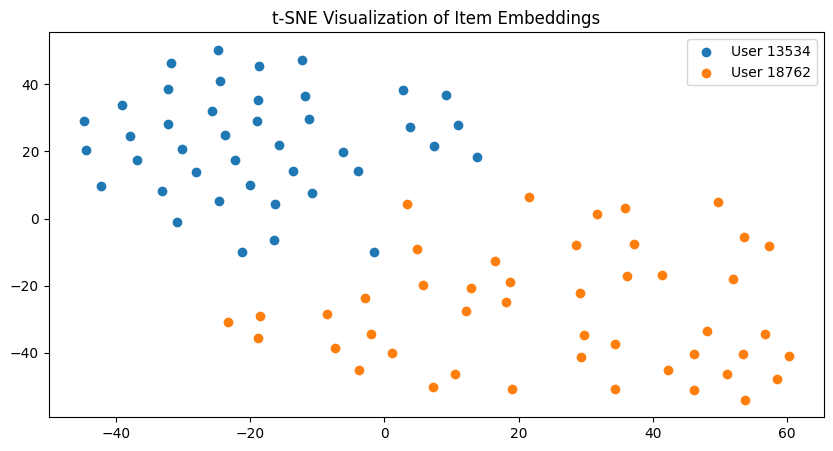

In [118]:
# アイテムの埋め込みベクトルを抽出
embeddings_13534 = np.array([item_embed[item_id].numpy() for item_id in user_13534_items if item_id in item_embed])
embeddings_18762 = np.array([item_embed[item_id].numpy() for item_id in user_18762_items if item_id in item_embed])

temp_np = np.concatenate([embeddings_13534, embeddings_18762])

embeddings_2d = tsne.fit_transform(temp_np)

tsne = TSNE(n_components=2, random_state=1)

tmp_embeddings_2d_13534 = embeddings_2d[:len(embeddings_13534), :]
tmp_embeddings_2d_18762 = embeddings_2d[len(embeddings_13534):, :]

# 可視化
plt.figure(figsize=(10, 5))
plt.scatter(tmp_embeddings_2d_13534[:, 0], tmp_embeddings_2d_13534[:, 1], label='User 13534')
plt.scatter(tmp_embeddings_2d_18762[:, 0], tmp_embeddings_2d_18762[:, 1], label='User 18762')
plt.legend()
plt.title('t-SNE Visualization of Item Embeddings')
plt.show()

In [93]:
np.var(embeddings_13534, axis=0).sum()

5.9023194

In [94]:
np.var(embeddings_18762, axis=0).sum()

12.19347

In [7]:
def calculate_distance_average(item_list, item_embed):
    distance_sum = 0.0
    count = 0
    for i in range(len(item_list)):
        for j in range(i + 1, len(item_list)):
            item_i = item_embed[item_list[i]]
            item_j = item_embed[item_list[j]]
            distance = torch.dist(item_i, item_j, p=2)  # ユークリッド距離の計算
            distance_sum += distance.item()
            count += 1
    return distance_sum / count if count > 0 else 0

In [7]:
# 距離の平均の計算
distance_avg_13534 = calculate_distance_average(user_13534_items, item_embed)
distance_avg_18762 = calculate_distance_average(user_18762_items, item_embed)

print("User 13534's Items Distance Average:", distance_avg_13534)
print("User 18762's Items Distance Average:", distance_avg_18762)


NameError: name 'user_13534_items' is not defined

## 6795と10712

In [16]:
# Extracting item IDs for user IDs 13534 and 18762
user_6795_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 6795]
user_10712_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 10712]

print(user_6795_items)
print(user_10712_items)

[914, 9226, 11878, 11880, 12270, 12702, 12946, 12997, 13055, 15203, 17066, 17119, 17120, 17785, 19850, 19851, 19853, 19855, 19856, 19861, 23047, 23186, 23722, 25839, 26696, 32400, 41301]
[1493, 1591, 1922, 2218, 2909, 3001, 4440, 4492, 5186, 5651, 5797, 5846, 6993, 7707, 8362, 9744, 9745, 9746, 9747, 9748, 9750, 9751, 11139, 13250, 13254, 16479, 19463, 22842, 30776]


In [125]:
print(len(user_6795_items))
print(len(user_10712_items))

27
29


d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


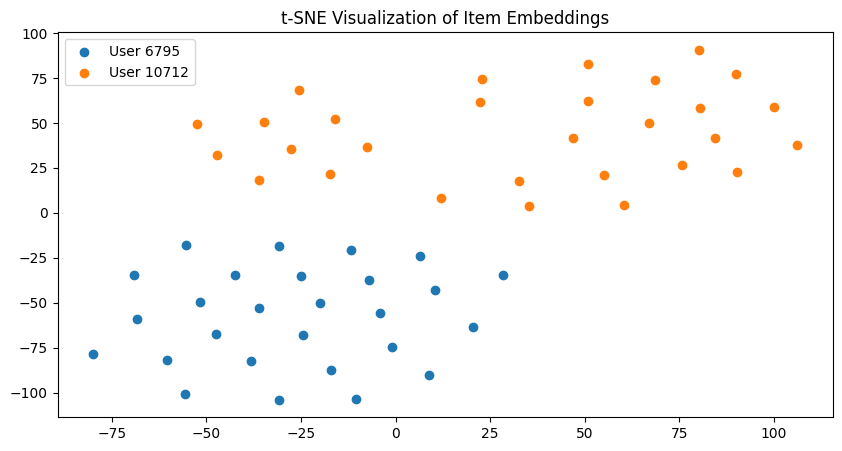

In [116]:
# アイテムの埋め込みベクトルを抽出
embeddings_6795 = np.array([item_embed[item_id].numpy() for item_id in user_6795_items if item_id in item_embed])
embeddings_10712 = np.array([item_embed[item_id].numpy() for item_id in user_10712_items if item_id in item_embed])

temp_np = np.concatenate([embeddings_6795, embeddings_10712])

tsne = TSNE(n_components=2, random_state=0)

embeddings_2d = tsne.fit_transform(temp_np)

tmp_embeddings_2d_6795 = embeddings_2d[:len(embeddings_6795), :]
tmp_embeddings_2d_10712 = embeddings_2d[len(embeddings_6795):, :]

# 可視化
plt.figure(figsize=(10, 5))
plt.scatter(tmp_embeddings_2d_6795[:, 0], tmp_embeddings_2d_6795[:, 1], label='User 6795')
plt.scatter(tmp_embeddings_2d_10712[:, 0], tmp_embeddings_2d_10712[:, 1], label='User 10712')
plt.legend()
plt.title('t-SNE Visualization of Item Embeddings')
plt.show()

In [98]:
np.var(embeddings_6795, axis=0).sum()

6.053999

In [99]:
np.var(embeddings_10712, axis=0).sum()

11.710244

In [123]:
# 距離の平均の計算
distance_avg_6795 = calculate_distance_average(user_6795_items, item_embed)
distance_avg_10712 = calculate_distance_average(user_10712_items, item_embed)

print("User 6795's Items Distance Average:", distance_avg_6795)
print("User 10712's Items Distance Average:", distance_avg_10712)


User 6795's Items Distance Average: 3.5102365179958506
User 10712's Items Distance Average: 4.816316177398701


## 3666と15348

In [18]:
# Extracting item IDs for user IDs 13534 and 18762
user_3666_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 3666]
user_15348_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 15348]

print(user_3666_items)
print(user_15348_items)

[93, 95, 96, 97, 120, 155, 5917, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 13037, 26085, 26086, 26092, 27139, 36796, 45712, 45713]
[1657, 1932, 2279, 3559, 3665, 5498, 7427, 8400, 21155, 21156, 21157, 21158, 21159, 21160, 22515, 24592, 24667, 27548, 29990, 31450, 34085, 38625, 39632, 39887, 39888, 39889, 46289]


In [137]:
print(len(user_3666_items))
print(len(user_15348_items))

22
27


d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


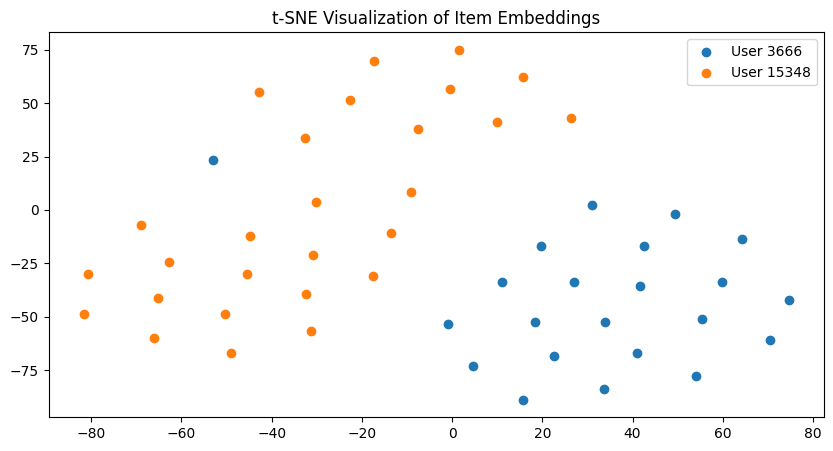

In [138]:
# アイテムの埋め込みベクトルを抽出
embeddings_3666 = np.array([item_embed[item_id].numpy() for item_id in user_3666_items if item_id in item_embed])
embeddings_15348 = np.array([item_embed[item_id].numpy() for item_id in user_15348_items if item_id in item_embed])

temp_np = np.concatenate([embeddings_3666, embeddings_15348])

tsne = TSNE(n_components=2, random_state=0)

embeddings_2d = tsne.fit_transform(temp_np)

tmp_embeddings_2d_3666 = embeddings_2d[:len(embeddings_3666), :]
tmp_embeddings_2d_15348 = embeddings_2d[len(embeddings_3666):, :]

# 可視化
plt.figure(figsize=(10, 5))
plt.scatter(tmp_embeddings_2d_3666[:, 0], tmp_embeddings_2d_3666[:, 1], label='User 3666')
plt.scatter(tmp_embeddings_2d_15348[:, 0], tmp_embeddings_2d_15348[:, 1], label='User 15348')
plt.legend()
plt.title('t-SNE Visualization of Item Embeddings')
plt.show()

In [139]:
# 距離の平均の計算
distance_avg_3666 = calculate_distance_average(user_3666_items, item_embed)
distance_avg_15348 = calculate_distance_average(user_15348_items, item_embed)

print("User 3666's Items Distance Average:", distance_avg_3666)
print("User 15348's Items Distance Average:", distance_avg_15348)

User 3666's Items Distance Average: 3.346429765998543
User 15348's Items Distance Average: 4.432879898453031


## 6795と15348

In [141]:
print(user_6795_items)
print(user_15348_items)

[914, 9226, 11878, 11880, 12270, 12702, 12946, 12997, 13055, 15203, 17066, 17119, 17120, 17785, 19850, 19851, 19853, 19855, 19856, 19861, 23047, 23186, 23722, 25839, 26696, 32400, 41301]
[1657, 1932, 2279, 3559, 3665, 5498, 7427, 8400, 21155, 21156, 21157, 21158, 21159, 21160, 22515, 24592, 24667, 27548, 29990, 31450, 34085, 38625, 39632, 39887, 39888, 39889, 46289]


In [140]:
print(len(user_6795_items))
print(len(user_15348_items))

27
27


d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


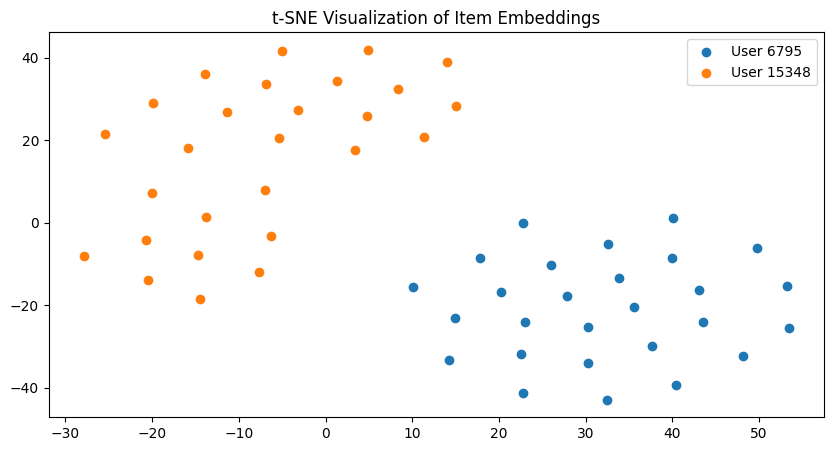

In [142]:
# アイテムの埋め込みベクトルを抽出
embeddings_6795 = np.array([item_embed[item_id].numpy() for item_id in user_6795_items if item_id in item_embed])
embeddings_15348 = np.array([item_embed[item_id].numpy() for item_id in user_15348_items if item_id in item_embed])

temp_np = np.concatenate([embeddings_6795, embeddings_15348])

tsne = TSNE(n_components=2, random_state=0)

embeddings_2d = tsne.fit_transform(temp_np)

tmp_embeddings_2d_6795 = embeddings_2d[:len(embeddings_6795), :]
tmp_embeddings_2d_15348 = embeddings_2d[len(embeddings_15348):, :]

# 可視化
plt.figure(figsize=(10, 5))
plt.scatter(tmp_embeddings_2d_6795[:, 0], tmp_embeddings_2d_6795[:, 1], label='User 6795')
plt.scatter(tmp_embeddings_2d_15348[:, 0], tmp_embeddings_2d_15348[:, 1], label='User 15348')
plt.legend()
plt.title('t-SNE Visualization of Item Embeddings')
plt.show()

In [19]:
# 距離の平均の計算
distance_avg_6795 = calculate_distance_average(user_6795_items, item_embed)
distance_avg_15348 = calculate_distance_average(user_15348_items, item_embed)

print("User 6795's Items Distance Average:", distance_avg_6795)
print("User 15348's Items Distance Average:", distance_avg_15348)

User 6795's Items Distance Average: 3.5102365179958506
User 15348's Items Distance Average: 4.432879898453031


## 17436と10357　→　ユーザベクトルが近い組み合わせ 結果無理だった

In [9]:
# Extracting item IDs for user IDs 13534 and 18762
user_17436_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 17436]
user_10357_items = [item_id for (user_id, item_id), attention in d_user_item.items() if user_id == 10357]

print(user_17436_items)
print(user_10357_items)
print(len(user_17436_items))
print(len(user_10357_items))

[9099, 9100, 9101, 9102, 20319, 20320, 20321, 20322, 20323, 20324, 20325, 20326, 20327, 20328, 20329, 20330, 20331, 20332, 38073, 46364, 47275, 47551, 47552, 47553, 47573, 47574, 47575, 47576, 48075, 48103, 48104]
[20319, 20320, 20321, 20322, 20323, 20324, 20325, 26198, 38205]
31
9


d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\fujiwara\KGAT-pytorch-master\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


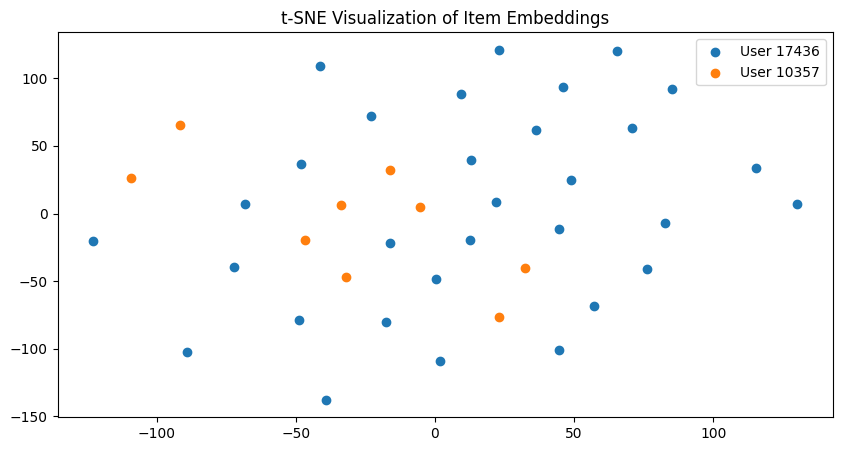

In [26]:
# アイテムの埋め込みベクトルを抽出
embeddings_17436 = np.array([item_embed[item_id].numpy() for item_id in user_17436_items if item_id in item_embed])
embeddings_10357 = np.array([item_embed[item_id].numpy() for item_id in user_10357_items if item_id in item_embed])

temp_np = np.concatenate([embeddings_17436, embeddings_10357])

tsne = TSNE(n_components=2, random_state=0)

embeddings_2d = tsne.fit_transform(temp_np)

tmp_embeddings_2d_17436 = embeddings_2d[:len(embeddings_17436), :]
tmp_embeddings_2d_10357 = embeddings_2d[len(embeddings_17436):, :]

# 可視化
plt.figure(figsize=(10, 5))
plt.scatter(tmp_embeddings_2d_17436[:, 0], tmp_embeddings_2d_17436[:, 1], label='User 17436')
plt.scatter(tmp_embeddings_2d_10357[:, 0], tmp_embeddings_2d_10357[:, 1], label='User 10357')
plt.legend()
plt.title('t-SNE Visualization of Item Embeddings')
plt.show()

In [41]:
# 距離の平均の計算
distance_avg_17436 = calculate_distance_average(user_17436_items, item_embed)
distance_avg_10357 = calculate_distance_average(user_10357_items, item_embed)

print("User 17436's Items Distance Average:", distance_avg_17436)
print("User 10357's Items Distance Average:", distance_avg_10357)

User 17436's Items Distance Average: 2.519797866222679
User 10357's Items Distance Average: 1.7854413087997172


# Attentionの平均値と購入アイテムのばらつきの散布図

## Attentionの平均値をユーザごとに格納しているリストを作成

In [10]:
# valuesを読み込む
with open('values_2050epoch.pkl', 'rb') as f:
	values = pickle.load(f)

In [11]:
values[17436]

[9.161930084228516,
 8.126654624938965,
 8.223222732543945,
 7.972728252410889,
 7.878114223480225,
 7.988041400909424,
 7.300845146179199,
 8.049938201904297,
 7.616275310516357,
 7.800802230834961,
 9.864185333251953,
 7.07270622253418,
 6.966524124145508,
 6.927523612976074,
 6.958478927612305,
 6.726637840270996,
 6.411616802215576,
 6.4978179931640625,
 9.051458358764648,
 7.929302215576172,
 7.966485977172852,
 7.855652809143066,
 8.506746292114258,
 8.174605369567871,
 7.037043571472168,
 7.7045769691467285,
 8.740999221801758,
 6.980844497680664,
 8.55553913116455,
 7.919748306274414,
 6.025045394897461]

In [12]:
average_attention_values = [sum(value_list) / len(value_list) for value_list in values.values()]

In [13]:
average_attention_values[23565]

6.425344058445522

d_user_item_meanと同じ

In [20]:
len(average_attention_values)

23566

## 購入アイテムのベクトルのばらつきを格納したリストを作成

In [11]:

user_items = {}
for (user_id, item_id), attention in tqdm(d_user_item.items()):
    if user_id not in user_items:
        user_items[user_id] = []
    user_items[user_id].append(item_id)

100%|██████████| 1289003/1289003 [00:00<00:00, 3938638.38it/s]


In [25]:
user_items[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112]

In [17]:
# valuesを読み込む
with open('user_items.pkl', 'rb') as f:
	user_items = pickle.load(f)

In [18]:
distance_avg = [calculate_distance_average(user_items[user_id], item_embed) for user_id in tqdm(range(len(average_attention_values)))]

100%|██████████| 23566/23566 [05:37<00:00, 69.78it/s] 


In [20]:
# valuesを読み込む
with open('distance_avg_2050epoch.pkl', 'wb') as f:
	pickle.dump(distance_avg, f)

  0%|          | 0/23566 [07:14<?, ?it/s]


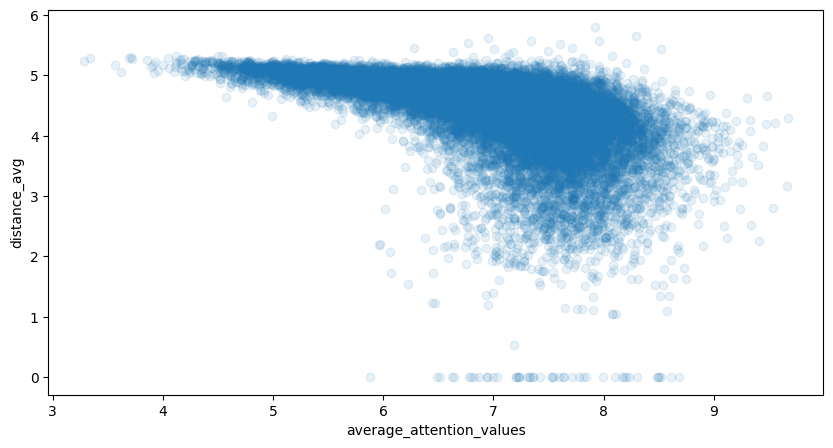

In [22]:
# 散布図に可視化
plt.figure(figsize=(10, 5))
plt.scatter(average_attention_values, distance_avg, alpha=0.1)
plt.xlabel('average_attention_values')
plt.ylabel('distance_avg')
plt.show()

In [23]:
np.corrcoef(average_attention_values, distance_avg)

array([[ 1.        , -0.55345688],
       [-0.55345688,  1.        ]])

In [12]:
buy_number = list(map(lambda x: len(x), user_items.values()))

In [24]:
with open('buy_number.pkl', 'rb') as f:
    buy_number = pickle.load(f)

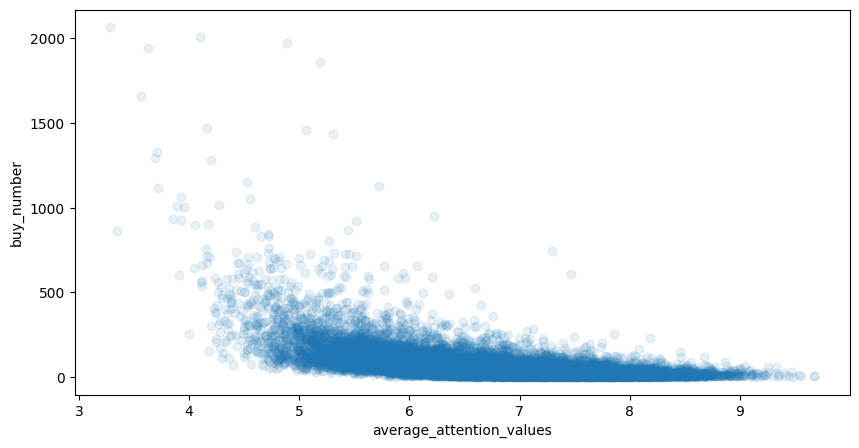

In [25]:
# 散布図に可視化
plt.figure(figsize=(10, 5))
plt.scatter(average_attention_values, buy_number, alpha=0.1)
plt.xlabel('average_attention_values')
plt.ylabel('buy_number')
plt.show()

In [26]:
np.corrcoef(average_attention_values, buy_number)

array([[ 1.        , -0.57553027],
       [-0.57553027,  1.        ]])

In [27]:
np.corrcoef(distance_avg, buy_number)

array([[1.        , 0.28389023],
       [0.28389023, 1.        ]])

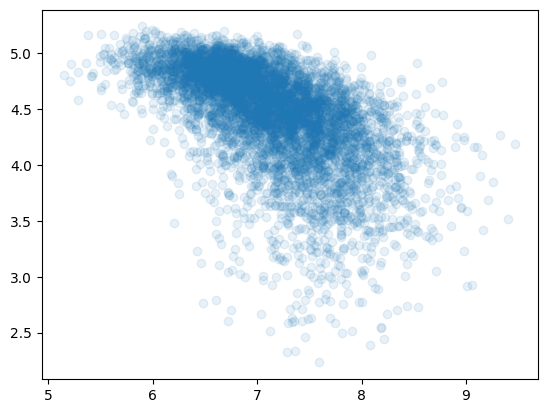

[[ 1.         -0.57176675]
 [-0.57176675  1.        ]]


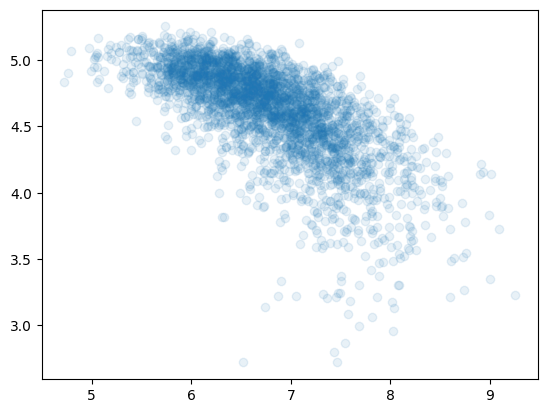

[[ 1.         -0.68628794]
 [-0.68628794  1.        ]]


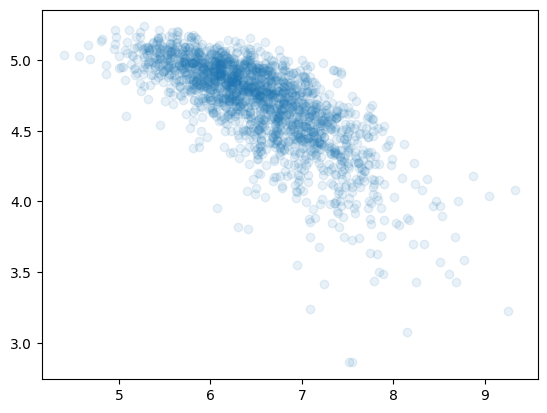

[[ 1.        -0.7328339]
 [-0.7328339  1.       ]]


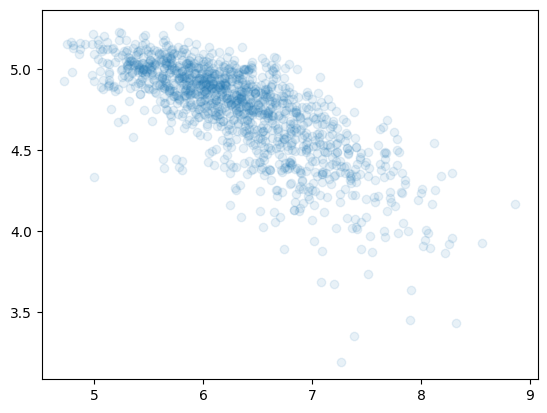

[[ 1.         -0.74618252]
 [-0.74618252  1.        ]]


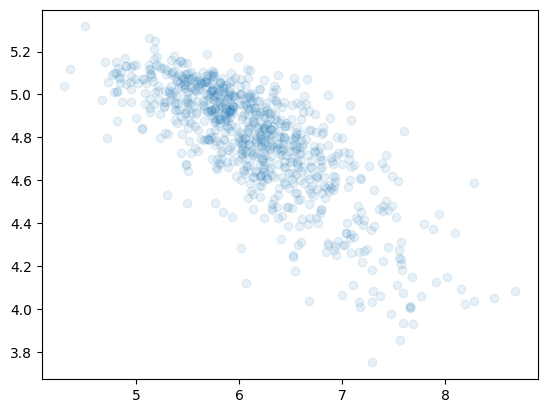

[[ 1.         -0.76611097]
 [-0.76611097  1.        ]]


In [29]:
step = 20
for t in range(20, 101, step):
    a = []
    b = []
    for d, at, buy in zip(distance_avg, average_attention_values, buy_number):
        if t <= buy <= t+step:
            a.append(at)
            b.append(d)

    plt.scatter(a, b, alpha=0.1)
    plt.show()
    print(np.corrcoef(a, b))